In [1]:
import os 
import matplotlib.pyplot as plt
%matplotlib inline
import subprocess
import shlex
import numpy as np
import pandas as pd

In [13]:
def run_simulation_real_data (filein_idx, filein_data, model, ratio):
    
    
    

    command = '../Real_data/Convergence_Readfile/bt_model_data.out ' + filein_idx + ' ' + filein_data + ' ' + str(model) + ' ' + str(ratio) 
#     print(shlex.split(command))

    process = subprocess.Popen(shlex.split(command), stdout=subprocess.PIPE,stderr=subprocess.PIPE)

    
    ##parse output
    output = process.communicate()[0].decode("utf-8")

    R, RL, BIN, BINL, scores = output.split(';;;')

    print(scores)

    results = {}
    for label, category_output in zip(['R', 'RL', 'BIN', 'BINL'], [R, RL, BIN, BINL]):
        parsed_data = split_output(category_output.split('\t'))
        results[label] = {
            "std_convergence_criteria": parsed_data[0],
            "log_convergence_criteria": parsed_data[1],
            "rms_convergence_criteria": parsed_data[2],
        }
    
    
    
    return results 


def split_output(convergence_result):
    
    data = [line.split() for line in convergence_result if line.strip()]

    # HOL_like, HO_like = data.pop(-1)

    data_np = np.array(data, dtype=float)
    std_convergence_criteria = data_np[:, 1]  
    log_connvergence_criteria = data_np[:, 2] 
    rms_convergence_criteria = data_np[:, 3] 

    return std_convergence_criteria, log_connvergence_criteria, rms_convergence_criteria


def average_convergence (filein_idx, filein_data, model, ratio, T):
    
    r = []
    rl = []
    bin = []
    binl = []

    for t in range(0, T):
        results_dict = run_simulation_real_data(filein_idx, filein_data, model, ratio)
        r.append(len(results_dict['R']['std_convergence_criteria']))
        rl.append(len(results_dict['RL']['std_convergence_criteria']))
        bin.append(len(results_dict['BIN']['std_convergence_criteria']))
        binl.append(len(results_dict['BINL']['std_convergence_criteria']))
        
    print("============== Iterations until convergence ==============")
    print(f" Ours- Higher Order: { np.mean(r)}")
    print(f" Zermello- Higher Order: { np.mean(rl)}")
    print(f" Ours- binary: { np.mean(bin)}")
    print(f" Zermello- bin: { np.mean(binl)}")
        

def plot_convergence(convergence_results_dict):
    # Iterate through each category in the dictionary
    plt.figure(figsize=(10, 6))
   

    plt.plot(convergence_results_dict['R']['std_convergence_criteria'][:1000], label='Ours-Higher Order')
    plt.plot(convergence_results_dict['RL']['std_convergence_criteria'][:1000], label='Zermello-Higher Order')
    plt.plot(convergence_results_dict['BIN']['std_convergence_criteria'][:1000], label='Ours-Binary Projection')
    plt.plot(convergence_results_dict['BINL']['std_convergence_criteria'][:1000], label='Zermello-Binary Projection')

    plt.xlabel("Iterations")
    plt.xscale('log')
    plt.yscale('log')
    plt.ylabel("RMS Error")
    plt.title(f"Iterations until convergence")
    plt.legend(loc="best")
    
    plt.show()






## UCL 

1 1.76516 1.76463
2 0.706321 0.70621
3 0.793841 0.793267
4 0.310763 0.310546
5 0.704179 0.704694
6 0.441336 0.441681
7 2.46617 2.46627
8 0.803164 0.803083
9 1.27986 1.27878
10 0.527565 0.527441
11 6.39849 6.39258
12 0.79745 0.797163
13 0.915964 0.916007
14 0.483799 0.484012
15 1.45345 1.4535
16 0.561503 0.561645
17 1.24739 1.24789
18 0.301015 0.300488
19 0.809835 0.809309
20 0.463702 0.463812
21 1.06375 1.06349
22 0.508633 0.508779
23 2.60597 2.60565
24 0.660736 0.660748
25 0.406173 0.405763
26 0.877094 0.876296
27 1.24361 1.24373
28 0.534958 0.535134
29 0.897758 0.897857
30 0.480499 0.480717
31 9.49978 9.48559
32 0.845751 0.845333
33 0.660736 0.660748
34 0.985918 0.986148
35 0.495965 0.496194
36 3.3565 3.35636
37 0.501919 0.501853
38 0.573169 0.573795
39 0.633005 0.632948
40 1.28375 1.28368
41 0.540351 0.540497
42 0.782658 0.782194
43 0.458194 0.458315
44 0.79745 0.797163
45 0.89276 0.893325
46 0.375493 0.375256
47 0.318797 0.318611
48 0.211637 0.211545
49 5.38723 5.38317
50 0.773844 

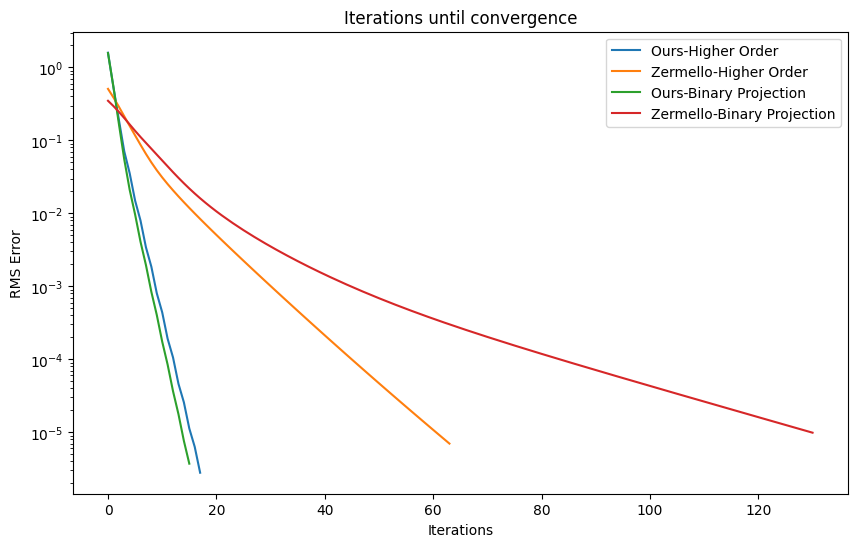

In [3]:
filein_idx = '../Data/00102_idx.txt'
filein_data = '../Data/00102_game.txt'


T = 1000
ratio = 0.8
model = 1

data_cl = run_simulation_real_data (filein_idx, filein_data, model, ratio)
plot_convergence(data_cl)


In [4]:
filein_idx = '../Data/00102_idx.txt'
filein_data = '../Data/00102_game.txt'


T = 1000
average_convergence(filein_idx, filein_data, model, ratio, T)

1 1.76516 1.76463
2 0.706321 0.70621
3 0.793841 0.793269
4 0.310763 0.310547
5 0.704181 0.7047
6 0.441336 0.441684
7 2.46617 2.4663
8 0.803163 0.803092
9 1.27986 1.27878
10 0.527566 0.527439
11 6.39849 6.39257
12 0.79745 0.797165
13 0.915965 0.916009
14 0.483799 0.484013
15 1.45345 1.4535
16 0.561503 0.561646
17 1.24739 1.24789
18 0.301015 0.300485
19 0.809836 0.80931
20 0.463702 0.463813
21 1.06376 1.0635
22 0.508633 0.50878
23 2.60597 2.60564
24 0.660736 0.660749
25 0.406174 0.405771
26 0.877094 0.876298
27 1.24361 1.24374
28 0.534958 0.535137
29 0.897759 0.897859
30 0.480499 0.480719
31 9.49978 9.48557
32 0.845752 0.845335
33 0.660736 0.660749
34 0.985917 0.986146
35 0.495965 0.496194
36 3.3565 3.35635
37 0.501916 0.501856
38 0.57317 0.573797
39 0.632999 0.632956
40 1.28376 1.2837
41 0.540348 0.540501
42 0.782658 0.782194
43 0.458194 0.458316
44 0.79745 0.797165
45 0.89276 0.893328
46 0.375493 0.375259
47 0.318797 0.318617
48 0.211637 0.21155
49 5.38723 5.38318
50 0.773844 0.773615


## World Cup Data

1 4.05845 4.05696
2 1.94073 1.94104
3 0.783026 0.782985
4 0.35412 0.354194
5 3.53529 3.53452
6 0.808245 0.808231
7 0.395531 0.395661
8 0.558385 0.55856
9 4.31784 4.31685
10 2.33494 2.33517
11 1.32598 1.3259
12 0.26686 0.266822
13 4.00129 4.00061
14 0.594755 0.594695
15 0.586096 0.586226
16 1.26567 1.26578
17 0.844808 0.844996
18 2.54144 2.54133
19 6.99838 6.99495
20 0.801582 0.801531
21 0.864335 0.864424
22 3.53864 3.5382
23 1.46651 1.46637
24 0.327924 0.327829
25 8.14617 8.14133
26 1.30297 1.30274
27 0.639557 0.639521
28 0.318706 0.318744
29 2.17942 2.17941
30 0.943291 0.943306
31 2.53759 2.53727
32 0.863644 0.863508
33 1.09493 1.09513
34 0.17337 0.173292
35 0.781641 0.781635
36 0.931526 0.931564
37 0.407182 0.40725
38 2.92495 2.92434
39 0.335825 0.335924
40 0.89903 0.899067
41 1.83906 1.83884
42 0.724219 0.72438
43 0.943563 0.943932
44 4.77169 4.77079
45 0.192057 0.191948
46 0.756217 0.75655
47 0.655937 0.656042
48 1.0175 1.0179
49 0.545694 0.545887
50 1.49806 1.49804
51 1.7217 1.721

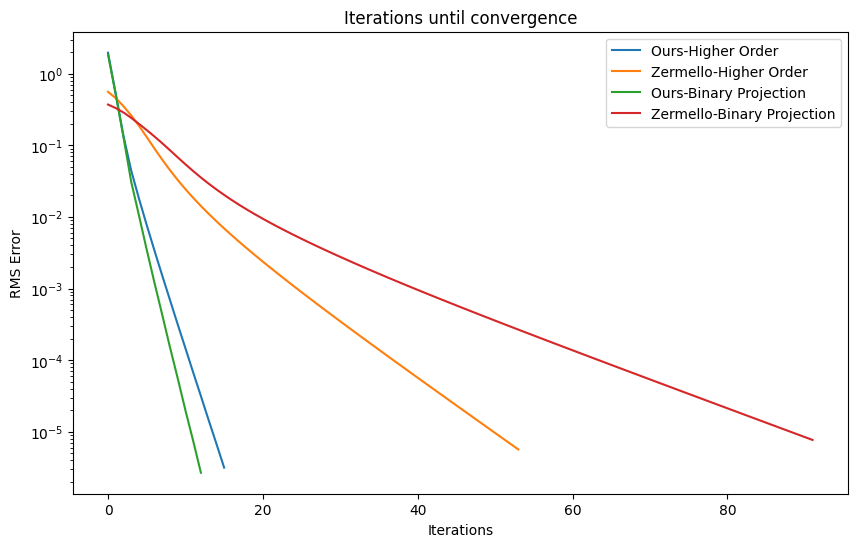

In [5]:
filein_idx = '../Data/00103_idx.txt'
filein_data = '../Data/00103_game.txt'


T = 1000
ratio = 0.8
model = 1

data_cl = run_simulation_real_data (filein_idx, filein_data, model, ratio)
plot_convergence(data_cl)

In [6]:
filein_idx = '../Data/00103_idx.txt'
filein_data = '../Data/00103_game.txt'


T = 1000
average_convergence(filein_idx, filein_data, model, ratio, T)

1 4.05845 4.05692
2 1.94073 1.94104
3 0.783024 0.782991
4 0.354121 0.354196
5 3.53528 3.53452
6 0.808246 0.808242
7 0.395532 0.395664
8 0.558386 0.558565
9 4.31784 4.31683
10 2.33494 2.33517
11 1.32598 1.32589
12 0.26686 0.266814
13 4.00129 4.0006
14 0.594754 0.594697
15 0.586096 0.586222
16 1.26567 1.26577
17 0.844806 0.844984
18 2.54144 2.54133
19 6.99837 6.99498
20 0.801582 0.801535
21 0.864335 0.864424
22 3.53865 3.53816
23 1.46651 1.46637
24 0.327924 0.327825
25 8.14617 8.14128
26 1.30297 1.30274
27 0.639557 0.639516
28 0.318706 0.318746
29 2.17942 2.17943
30 0.943291 0.943317
31 2.53759 2.53729
32 0.863645 0.863522
33 1.09493 1.09512
34 0.17337 0.17328
35 0.781641 0.781632
36 0.931527 0.931564
37 0.407182 0.40725
38 2.92495 2.92433
39 0.335825 0.335923
40 0.89903 0.899071
41 1.83906 1.83885
42 0.724217 0.72438
43 0.943574 0.943927
44 4.77169 4.77079
45 0.192058 0.191956
46 0.756217 0.756553
47 0.655936 0.656045
48 1.0175 1.01789
49 0.545696 0.545887
50 1.49806 1.49804
51 1.7217 1

## AGH Course Selection

1 576.67 521.643
2 0.4869 0.493069
3 0.452888 0.458623
4 0.643363 0.651515
5 0.671062 0.679545
6 0.308186 0.312075
7 0.348494 0.352888
8 0.860704 0.871549
9 0.197043 0.199496



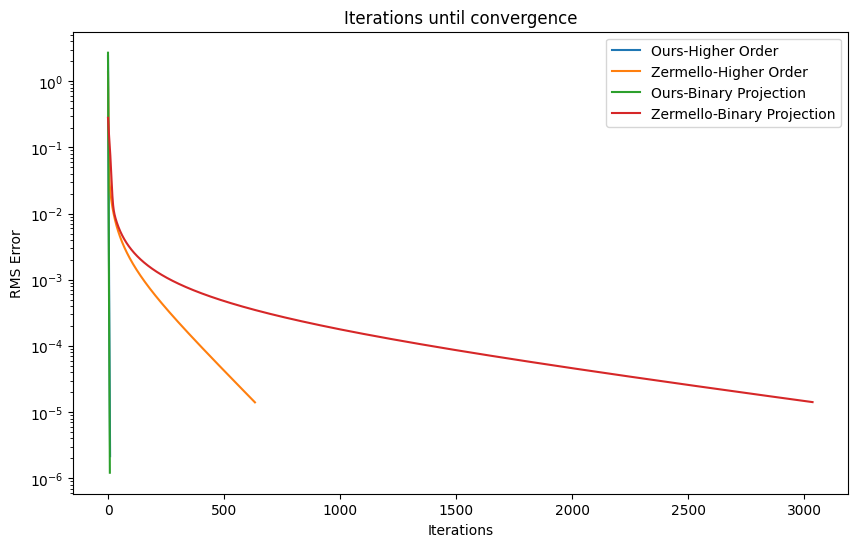

In [7]:
filein_idx = '../Data/00009_idx.txt'
filein_data = '../Data/00009_game.txt'



T = 1
ratio = 0.8
model = 1

data_cl = run_simulation_real_data (filein_idx, filein_data, model, ratio)
plot_convergence(data_cl)

In [8]:
filein_idx = '../Data/00009_idx.txt'
filein_data = '../Data/00009_game.txt'

T = 20
average_convergence(filein_idx, filein_data, model, ratio, T)

1 576.67 521.636
2 0.486899 0.49307
3 0.452887 0.458624
4 0.643365 0.651516
5 0.671063 0.679546
6 0.308186 0.312075
7 0.348494 0.352889
8 0.860703 0.87155
9 0.197043 0.199496

1 576.67 521.645
2 0.4869 0.493069
3 0.452888 0.458623
4 0.643363 0.651514
5 0.671062 0.679544
6 0.308186 0.312075
7 0.348494 0.352888
8 0.860704 0.871548
9 0.197043 0.199495

1 576.67 521.651
2 0.486899 0.493068
3 0.452887 0.458622
4 0.643364 0.651513
5 0.671062 0.679544
6 0.308186 0.312074
7 0.348494 0.352887
8 0.860703 0.871547
9 0.197043 0.199495

1 576.67 521.652
2 0.486899 0.493068
3 0.452888 0.458622
4 0.643364 0.651513
5 0.671062 0.679543
6 0.308186 0.312074
7 0.348494 0.352887
8 0.860704 0.871547
9 0.197043 0.199495

1 576.67 521.638
2 0.486899 0.49307
3 0.452888 0.458624
4 0.643363 0.651515
5 0.671062 0.679546
6 0.308186 0.312075
7 0.348494 0.352888
8 0.860704 0.87155
9 0.197043 0.199496

1 576.67 521.648
2 0.4869 0.493069
3 0.452888 0.458623
4 0.643363 0.651514
5 0.671062 0.679544
6 0.308186 0.312075
7

1 0.000250149 3.87233e-05
2 0.000921984 0.0014898
3 2.52423 2.671
4 0.4172 0.427021
5 0.0796888 0.0871532
6 0.00201735 0.00726439
7 0.0688932 0.0149216
8 2.84279 3.36495
9 4.86363 3.20177
10 6.99009 2.34606
11 7.53634 48.4349
12 50.5596 74.9485
13 776.364 5925.13
14 12.7673 8.80722
15 1018.43 335.98



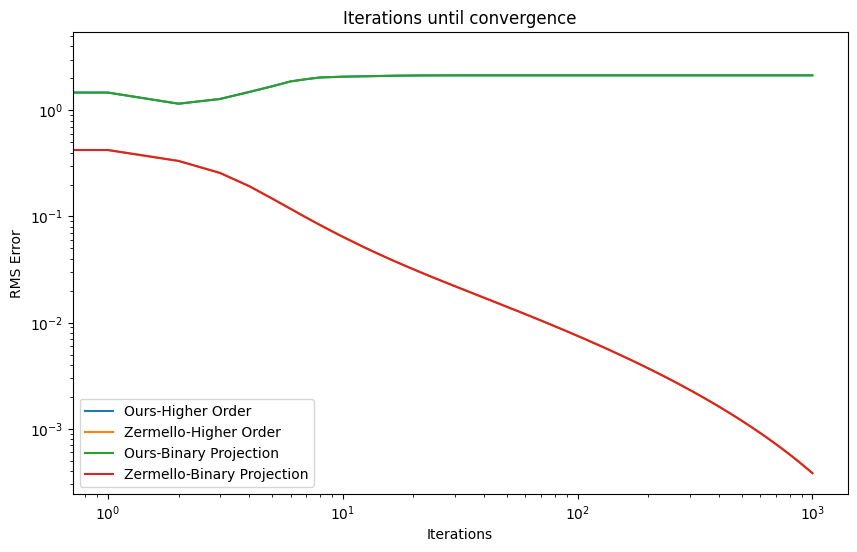

In [14]:
filein_idx = '../Data/00105_idx.txt'
filein_data = '../Data/00105_game.txt'

data_cl = run_simulation_real_data (filein_idx, filein_data, model, ratio)
plot_convergence(data_cl)

In [11]:

filein_idx = '../Data/00105_idx.txt'
filein_data = '../Data/00105_game.txt'

T = 1
average_convergence(filein_idx, filein_data, model, ratio, T)

1 0.000250149 3.87226e-05
2 0.000921984 0.00148978
3 2.52423 2.671
4 0.4172 0.427022
5 0.0796888 0.0871533
6 0.00201735 0.00726435
7 0.0688932 0.0149216
8 2.84279 3.36496
9 4.86363 3.20177
10 6.99009 2.34607
11 7.53634 48.4351
12 50.5596 74.9489
13 776.364 5925.17
14 12.7673 8.80724
15 1018.43 335.982

============== Iterations until convergence ==============
 Ours- Higher Order: 100000.0
 Zermello- Higher Order: 2770.0
 Ours- binary: 100000.0
 Zermello- bin: 2770.0


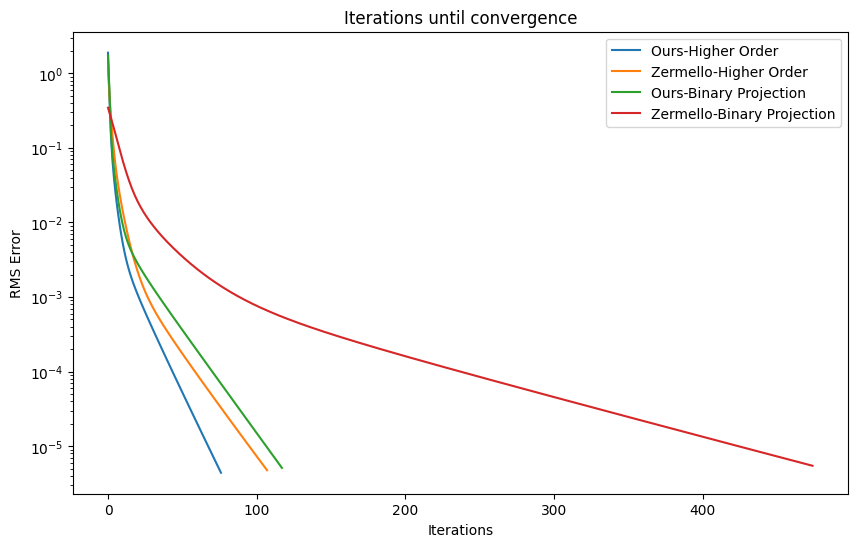

In [ ]:
filein_idx = '../Data/00101_idx.txt'
filein_data = '../Data/00101_game.txt'

data_cl = run_simulation_real_data (filein_idx, filein_data, model, ratio)
plot_convergence(data_cl)

In [ ]:
filein_idx = '../Data/00101_idx.txt'
filein_data = '../Data/00101_game.txt'

T = 1
average_convergence(filein_idx, filein_data, model, ratio, T)

============== Iterations until convergence ==============
 Ours- Higher Order: 78.0
 Zermello- Higher Order: 109.0
 Ours- binary: 118.0
 Zermello- bin: 476.0
